# WIND TURBINES PREDICTIVE MAINTENANCE THROUGH ML: GET THE DATA - SOLUTION (1)

In this first session, we will frame the problem and explore the data.

# 1. Frame the problem:

*Energias De Portugal (EDP)* provided the dataset that we are using in this project. 
The dataset contains measurements from **five turbines**. Measurements have been recorded every **ten minutes** over the course of two years, **2016 and 2017**. The data from 2016 is used as **training data** and the data from 2017 is used for **testing** purposes. The measurements are composed of **81 variables** derived from sensors that monitor components and environmental aspects. For details about the variables, sensors and components, please see the *WindTurbine_Datasheet.pdf" document. 

The data provided by EDP covers **5** components: gearbox, generator, generator bearing, transformer and hydraulic group.


# 2. Download important libraries

In [1]:
import matplotlib.pyplot as plt #Plotting framework
import numpy as np #numerical computing tools
import pandas as pd #data analysis
import os #interacting with the operating system

# 3. Define global variables
Change these variables to match the files in your machine

In [2]:
DATA_ROOT = "Training/"
DATA_CLEAN_ROOT = 'data_clean'
DATA_SIGNAL = "Training_signals.csv"
DATA_MAST = "Training_metmast.csv"
DATA_FAILURE = "Training_failures.csv"

# 4. Explore Signals data

## a) Load the data

In [3]:
df = pd.read_csv(os.path.join(DATA_ROOT, DATA_SIGNAL))

In [4]:
df.head()

,Unnamed: 0,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,0,T11,2016-01-01 00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59,61,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9
1,1,T06,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51,52,...,-307.1,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6
2,2,T01,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
3,3,T09,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
4,4,T07,2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3


From this first look into the signals data, we can say that:

- There are different turbines (column Turbine_ID)
- There's a timestamp column that we can use as index

How many turbines are in the dataset?

In [5]:
turbines = df.Turbine_ID.unique()
print(turbines)

['T11' 'T06' 'T01' 'T09' 'T07']


It appears that Turbines data contains measurements from five turbines, such as rpm for the generator and for the rotor, temperature for generator bearing, oil in the hydraulic group and in the gearbox, power, and more. These measurements have been recorded every ten minutes for one year (2016).

Now let's get some general information on the dataset.

In [6]:
df.info(max_cols=0)  #truncated summary of information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260278 entries, 0 to 260277
Columns: 84 entries, Unnamed: 0 to Nac_Direction_Avg
dtypes: float64(51), int64(31), object(2)
memory usage: 166.8+ MB


<!-- The dataset contains 434145 rows and 83 columns.  -->

In [7]:
df.describe()

,Unnamed: 0,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
count,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,...,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000,260278.000000
mean,130138.500000,1167.439259,912.786438,1043.156198,68.240057,46.805566,63.153328,62.971772,62.482642,37.591460,...,-533.918105,-366.340441,-669.842470,75.232071,504.558928,659.221115,320.828906,82.124825,42.959958,190.481076
std,75135.931019,643.136561,612.224930,617.345529,111.234919,16.781771,27.799186,26.980202,26.438706,8.503619,...,425.275341,388.420744,444.851408,97.200922,414.566702,442.401451,358.286442,100.127606,14.315965,94.986723
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.000000,20.000000,20.000000,22.000000,...,-1000.000000,-1000.000000,-1000.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,19.000000,0.000000
25%,65069.250000,296.100000,181.800000,254.100000,13.900000,35.000000,41.000000,41.000000,41.000000,30.000000,...,-986.300000,-583.300000,-1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,103.500000
50%,130138.500000,1409.800000,1231.000000,1273.200000,28.500000,44.000000,59.000000,60.000000,59.000000,36.000000,...,-629.500000,-224.500000,-1000.000000,16.500000,513.250000,1000.000000,224.500000,30.300000,41.000000,185.600000
75%,195207.750000,1677.400000,1344.200000,1573.700000,70.900000,57.000000,75.000000,75.000000,74.000000,46.000000,...,0.000000,0.000000,0.000000,142.100000,965.900000,1000.000000,516.400000,154.400000,52.000000,279.300000
max,260277.000000,2040.900000,1666.100000,1683.700000,823.200000,205.000000,205.000000,205.000000,205.000000,55.000000,...,0.000000,200.000000,0.000000,500.000000,1000.000000,1000.000000,1000.000000,500.000000,205.000000,359.000000



## b) Deal with missing values

Let's check if there are null values.

In [8]:
nans_info = list()
for col in df.columns:
    if df[col].hasnans:
        nans_info.append(f'Columns {col} has {df[col].isnull().sum()} null values')
#         print(f'Columns {col} has {df[col].isnull().sum()} null values')
if len(nans_info) == 0:
    missing_values = False
    print('No missing values')
else:
    missing_values = True
    [print(_) for _ in nans_info]

No missing values


Only two features are concerned with null values: *Gen_Bear_Temp_Avg* and *Grd_Prod_CosPhi_Avg*.
    
Let's check them out:

In [9]:
df.loc[df['Grd_Prod_CosPhi_Avg'].isnull()]

,Unnamed: 0,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg


The colomn *Grd_Prod_CosPhi_Avg* is in the middle of the matrix. Therefore, it does not appear in the table above. Let's check *Gen_Bear_Temp_Avg*.

In [10]:
df.loc[df['Gen_Bear_Temp_Avg'].isnull()]

,Unnamed: 0,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg


The *NaN* values can be seen clearly for this feature. It appears that Turbine *T09* has 3 missing values while the other turbines *T07*, *T06*, *T011*, *T01* have one missing value each.

It is worth noting that *NaN* values have to be handled before developing Machine Learning models, in order to avoid errors. Out of all the measurements, 7 contained null values. Due to the large amount of available correct data, these measurements can be removed from the dataset or can be replaced using interpolation.

In this project, we are going to use interpolation to deal with missing values. However, since the dataset has 5 turbines all mixed together, we have to structure the data. In order to do that, we are going to transform the Timestamp column into a Pandas `datetime` column. Then we are going to create a pandas multiindex with the Turbine ID and the timestamp. We are going to sort the multiindex and finally fill the null value by interpolating.

In [11]:
df.Timestamp = pd.to_datetime(df.Timestamp)  #Convert argument to datetime.
df.set_index(['Turbine_ID', 'Timestamp'], inplace=True)  #Create a MultiIndex using columns ‘Turbine ID’ and ‘Timestamp’
df.sort_index(inplace=True)
df['Grd_Prod_CosPhi_Avg'].interpolate(inplace=True)
df['Gen_Bear_Temp_Avg'].interpolate(inplace=True)

Let's display the new dataset:

In [12]:
df.head()

Unnamed: 0  Gen_RPM_Max  Gen_RPM_Min  \
Turbine_ID Timestamp                                                         
T01        2016-01-01 00:00:00+00:00           2       1277.4       1226.1   
           2016-01-01 00:10:00+00:00           8       1268.3         93.3   
           2016-01-01 00:20:00+00:00          13       1394.4        220.3   
           2016-01-01 00:30:00+00:00          15       1306.6       1212.4   
           2016-01-01 00:40:00+00:00          21       1320.9       1224.1   

                                      Gen_RPM_Avg  Gen_RPM_Std  \
Turbine_ID Timestamp                                             
T01        2016-01-01 00:00:00+00:00       1249.0          9.0   
           2016-01-01 00:10:00+00:00        999.7        435.9   
           2016-01-01 00:20:00+00:00        774.0        486.1   
           2016-01-01 00:30:00+00:00       1257.1         17.0   
           2016-01-01 00:40:00+00:00       1257.7         18.0   

                                      Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Turbine_ID Timestamp                                                           
T01        2016-01-01 00:00:00+00:00               41.0                   58   
           2016-01-01 00:10:00+00:00               41.0                   58   
           2016-01-01 00:20:00+00:00               41.0                   57   
           2016-01-01 00:30:00+00:00               40.0                   56   
           2016-01-01 00:40:00+00:00               40.0                   57   

                                      Gen_Phase2_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2016-01-01 00:00:00+00:00                   59   
           2016-01-01 00:10:00+00:00                   59   
           2016-01-01 00:20:00+00:00                   57   
           2016-01-01 00:30:00+00:00                   57   
           2016-01-01 00:40:00+00:00                   58   

                                      Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
Turbine_ID Timestamp                                                          
T01        2016-01-01 00:00:00+00:00                   58                30   
           2016-01-01 00:10:00+00:00                   59                30   
           2016-01-01 00:20:00+00:00                   57                30   
           2016-01-01 00:30:00+00:00                   57                30   
           2016-01-01 00:40:00+00:00                   57                30   

                                      ...  Grd_Prod_PsbleInd_Avg  \
Turbine_ID Timestamp                  ...                          
T01        2016-01-01 00:00:00+00:00  ...                 -144.4   
           2016-01-01 00:10:00+00:00  ...                  -79.6   
           2016-01-01 00:20:00+00:00  ...                 -314.0   
           2016-01-01 00:30:00+00:00  ...                 -654.0   
           2016-01-01 00:40:00+00:00  ...                 -496.1   

                                      Grd_Prod_PsbleInd_Max  \
Turbine_ID Timestamp                                          
T01        2016-01-01 00:00:00+00:00                    0.0   
           2016-01-01 00:10:00+00:00                    0.0   
           2016-01-01 00:20:00+00:00                    0.0   
           2016-01-01 00:30:00+00:00                    0.0   
           2016-01-01 00:40:00+00:00                    0.0   

                                      Grd_Prod_PsbleInd_Min  \
Turbine_ID Timestamp                                          
T01        2016-01-01 00:00:00+00:00                 -584.5   
           2016-01-01 00:10:00+00:00                 -501.0   
           2016-01-01 00:20:00+00:00                -1000.0   
           2016-01-01 00:30:00+00:00                -1000.0   
           2016-01-01 00:40:00+00:00                -1000.0   

                                      Grd_Prod_PsbleInd_Std  \
Turbine_ID Timestamp                                         

## c) Deal with outliers

An outlier is a data point that differs significantly from other observations. An outlier may indicate:

- a variability in the measurement 
- a temporary malfunction in a sensor
- a correct value that is the result of a component malfunction
- an error in data transmission or transcription

In order to deal with outliers, Z-scores can be used, especially when the data follows a normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls. For example, a Z-score of 2 indicates that an observation is two standard deviations above the average while a Z-score of -2 signifies it is two standard deviations below the mean. A Z-score of zero represents a value that equals the mean.

Let's compute the 𝑧𝑠𝑐𝑜𝑟𝑒 of each datapoint. The Z score is defined as:

$$
z={x-\mu  \over \sigma }
$$

where:

- μ is the mean of the population.
- σ is the standard deviation of the population

Obviously, we need to do it for each turbine.


In [13]:
avg_cols = [c for c in df.columns if 'avg' in c.lower()] #Search for 'avg' in the columns names
z_scores = df[avg_cols].groupby('Turbine_ID').apply(lambda x: (x - x.mean()) / x.std()) # compute z-score for each grouped turbine
z_scores

Gen_RPM_Avg  Gen_Bear_Temp_Avg  \
Turbine_ID Timestamp                                                   
T01        2016-01-01 00:00:00+00:00     0.374745          -0.304321   
           2016-01-01 00:10:00+00:00    -0.020510          -0.304321   
           2016-01-01 00:20:00+00:00    -0.378348          -0.304321   
           2016-01-01 00:30:00+00:00     0.387588          -0.365213   
           2016-01-01 00:40:00+00:00     0.388539          -0.365213   
...                                           ...                ...   
T11        2016-12-31 23:10:00+00:00     0.839004          -0.465889   
           2016-12-31 23:20:00+00:00     0.872402          -0.396945   
           2016-12-31 23:30:00+00:00     0.862417          -0.396945   
           2016-12-31 23:40:00+00:00     0.733473          -0.396945   
           2016-12-31 23:50:00+00:00     0.883075          -0.396945   

                                      Gen_Phase1_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2016-01-01 00:00:00+00:00            -0.220252   
           2016-01-01 00:10:00+00:00            -0.220252   
           2016-01-01 00:20:00+00:00            -0.253404   
           2016-01-01 00:30:00+00:00            -0.286556   
           2016-01-01 00:40:00+00:00            -0.253404   
...                                                   ...   
T11        2016-12-31 23:10:00+00:00            -0.135132   
           2016-12-31 23:20:00+00:00            -0.048285   
           2016-12-31 23:30:00+00:00            -0.048285   
           2016-12-31 23:40:00+00:00            -0.048285   
           2016-12-31 23:50:00+00:00            -0.048285   

                                      Gen_Phase2_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2016-01-01 00:00:00+00:00            -0.160945   
           2016-01-01 00:10:00+00:00            -0.160945   
           2016-01-01 00:20:00+00:00            -0.232080   
           2016-01-01 00:30:00+00:00            -0.232080   
           2016-01-01 00:40:00+00:00            -0.196512   
...                                                   ...   
T11        2016-12-31 23:10:00+00:00            -0.113914   
           2016-12-31 23:20:00+00:00            -0.070065   
           2016-12-31 23:30:00+00:00            -0.026215   
           2016-12-31 23:40:00+00:00            -0.026215   
           2016-12-31 23:50:00+00:00            -0.026215   

                                      Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
Turbine_ID Timestamp                                                          
T01        2016-01-01 00:00:00+00:00            -0.174028         -0.469534   
           2016-01-01 00:10:00+00:00            -0.137779         -0.469534   
           2016-01-01 00:20:00+00:00            -0.210276         -0.469534   
           2016-01-01 00:30:00+00:00            -0.210276         -0.469534   
           2016-01-01 00:40:00+00:00            -0.210276         -0.469534   
...                                                   ...               ...   
T11        2016-12-31 23:10:00+00:00            -0.102369         -1.054261   
           2016-12-31 23:20:00+00:00            -0.058329         -1.188916   
           2016-12-31 23:30:00+00:00            -0.014289         -1.188916   
           2016-12-31 23:40:00+00:00            -0.058329         -1.188916   
           2016-12-31 23:50:00+00:00            -0.014289         -1.188916   

                                      Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  \
Turbine_ID Timestamp                                                          
T01        2016-01-01 00:00:00+00:00          -0.402298           -0.210940   
           2016-01-01 00:10:00+00:00          -0.402298           -0.210940   
           2016-01-01 00:20:00+00:00          -0.546622           -0.420542   
           2016-01-01 00:30:00+00:00          -0.402298           -0.210940   
           

In [14]:
outliers_counts = z_scores.groupby('Turbine_ID').apply(lambda x: (x > 3).sum())
outliers_counts

,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,...,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Busbar_Temp_Avg,Amb_WindSpeed_Est_Avg,Grd_Prod_ReactPwr_Avg,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleCap_Avg,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Turbine_ID,,,,,,,,,,,,,,,,,,,,,
T01,0,0,0,0,0,0,0,0,73,0,...,0,0,97,378,28,0,0,0,0,0
T06,0,109,107,134,103,0,0,0,242,0,...,0,0,0,253,28,0,0,0,103,0
T07,0,46,0,0,0,0,0,0,82,0,...,0,0,345,340,15,0,0,0,0,0
T09,0,0,0,0,0,0,0,0,21,0,...,0,0,0,272,1,0,0,0,125,0
T11,0,0,0,0,0,0,0,0,30,0,...,0,0,408,197,28,0,0,0,0,0


In [15]:
outliers_counts.sum() # Sum of columns
outliers_ranking = outliers_counts.transpose().loc[outliers_counts.sum() > 0] # transpose the submatrix where columns =/ 0
outliers_counts.transpose()

Turbine_ID,T01,T06,T07,T09,T11
Gen_RPM_Avg,0,0,0,0,0
Gen_Bear_Temp_Avg,0,109,46,0,0
Gen_Phase1_Temp_Avg,0,107,0,0,0
Gen_Phase2_Temp_Avg,0,134,0,0,0
Gen_Phase3_Temp_Avg,0,103,0,0,0
Hyd_Oil_Temp_Avg,0,0,0,0,0
Gear_Oil_Temp_Avg,0,0,0,0,0
Gear_Bear_Temp_Avg,0,0,0,0,0
Nac_Temp_Avg,73,242,82,21,30
Rtr_RPM_Avg,0,0,0,0,0


In [16]:
outliers_ranking['total'] = outliers_ranking.sum(axis=1)  #Sum the columns

In [17]:
outliers_ranking.sort_values('total', inplace=True, ascending=False)

In [18]:
outliers_ranking

Turbine_ID,T01,T06,T07,T09,T11,total
Blds_PitchAngle_Avg,1325,1679,1765,1416,577,6762
Amb_WindDir_Relative_Avg,1039,907,1006,917,873,4742
Amb_WindSpeed_Avg,410,402,375,298,275,1760
Amb_WindSpeed_Est_Avg,378,253,340,272,197,1440
HVTrafo_Phase3_Temp_Avg,392,0,11,769,34,1206
Grd_Prod_Freq_Avg,299,0,315,305,278,1197
HVTrafo_Phase2_Temp_Avg,322,0,254,409,6,991
Cont_VCP_Temp_Avg,100,6,351,0,393,850
Grd_Busbar_Temp_Avg,97,0,345,0,408,850
Cont_Hub_Temp_Avg,102,121,190,135,127,675


<AxesSubplot:ylabel='Frequency'>

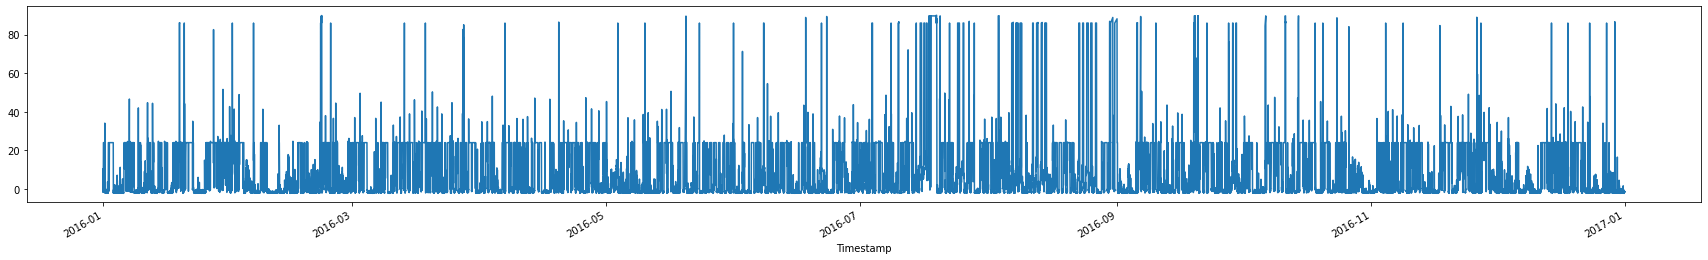

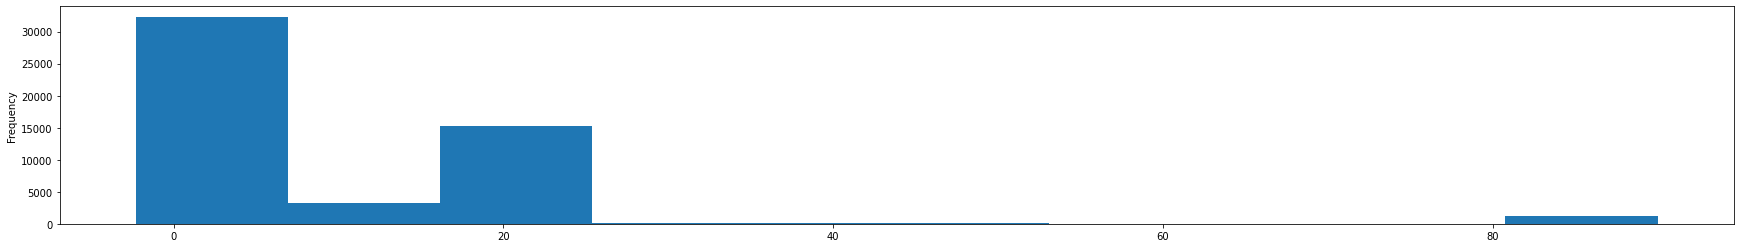

In [19]:
fig, ax = plt.subplots(figsize=(30,4))
df.loc['T01']['Blds_PitchAngle_Avg'].plot(ax=ax)
fig, ax = plt.subplots(figsize=(30,4))
df.loc['T01']['Blds_PitchAngle_Avg'].plot(ax=ax,kind='hist')

To deal with outliers, the available choices are to drop, keep or transform the outlier. However, there is a chance that similar cases will occur in the test data. Therefore, all outliers will be kept in the dataset for the following.

## d) Export the data

In [20]:
if not os.path.exists(DATA_CLEAN_ROOT):
    os.makedirs(DATA_CLEAN_ROOT)

df.to_pickle(os.path.join(DATA_CLEAN_ROOT, 'turbines_df.p'))  #Pickle (serialize) df and store it in DATA_CLEAN_ROOT

# 5. Explore Mast data

## a) Load the data

In [21]:
mast = pd.read_csv(os.path.join(DATA_ROOT, DATA_MAST), sep=',')

In [22]:
mast.head()

,Unnamed: 0,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,0,2016-01-01 00:00:00+00:00,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,...,0,0.0499,0.24,1,0,0,600,98,99,418
1,1,2016-01-01 00:10:00+00:00,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,...,0,0.0499,0.24,1,0,0,600,99,101,418
2,2,2016-01-01 00:20:00+00:00,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,...,0,0.0499,0.24,1,0,0,600,111,113,418
3,3,2016-01-01 00:30:00+00:00,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,...,0,0.0499,0.24,1,0,0,600,122,125,418
4,4,2016-01-01 00:40:00+00:00,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,...,0,0.0499,0.24,1,0,0,600,121,123,417


The metmast data contains measurements of the parameters related to the environment of the turbines, such as wind speed, wind direction, the temperatures, the pressures, and more. These measurements have been recorded every ten minutes for one year (2016).


## b) Deal with missing values

Let's check if there are null values.

In [23]:
for col in mast.columns:
    if mast[col].hasnans:
        print(f'Columns {col} has {mast[col].isnull().sum()} null values')

Columns Min_Humidity has 1 null values
Columns Avg_Humidity has 1 null values


It appears that the data contains only 2 missing values, that we are going to deal with by using interpolation.

In [24]:
for col in mast.columns:
    if mast[col].hasnans:
        mast[col].interpolate(inplace=True)

## Setting up the index

In [25]:
mast['Timestamp'] = pd.to_datetime(mast['Timestamp'])
mast.set_index('Timestamp', inplace=True)
mast.sort_index(inplace=True)

In [26]:
mast.head()

,Unnamed: 0,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,236.0,...,0,0.0499,0.24,1,0,0,600,98,99,418
2016-01-01 00:10:00+00:00,1,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,236.0,...,0,0.0499,0.24,1,0,0,600,99,101,418
2016-01-01 00:20:00+00:00,2,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,236.0,...,0,0.0499,0.24,1,0,0,600,111,113,418
2016-01-01 00:30:00+00:00,3,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,236.0,...,0,0.0499,0.24,1,0,0,600,122,125,418
2016-01-01 00:40:00+00:00,4,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,236.0,...,0,0.0499,0.24,1,0,0,600,121,123,417


## c) Deal with outliers

In [27]:
zscores_mast = mast.apply(lambda x: (x - x.mean()) / x.std())
outliers_threshold_mast = 3
outliers_mast = zscores_mast.apply(lambda x: (x > outliers_threshold_mast).sum())
outliers_mast = outliers_mast.loc[outliers_mast > 0].sort_values(ascending=False)

In [28]:
outliers_mast

Var_Windspeed2          1034
Var_Windspeed1          1017
Max_Precipitation        479
Min_Precipitation        440
Avg_Precipitation        433
Min_Windspeed1           341
Avg_Windspeed2           322
Anemometer2_Avg_Freq     319
Min_Windspeed2           299
Avg_Windspeed1           296
Anemometer1_Avg_Freq     294
Max_Windspeed2           266
Max_Windspeed1           247
Max_Pressure             159
Avg_Pressure             109
Avg_AmbientTemp          104
Pressure_Avg_Freq        100
Min_Pressure              77
Max_AmbientTemp           77
Min_AmbientTemp           75
Var_Winddirection2         2
Max_Raindetection          1
dtype: int64

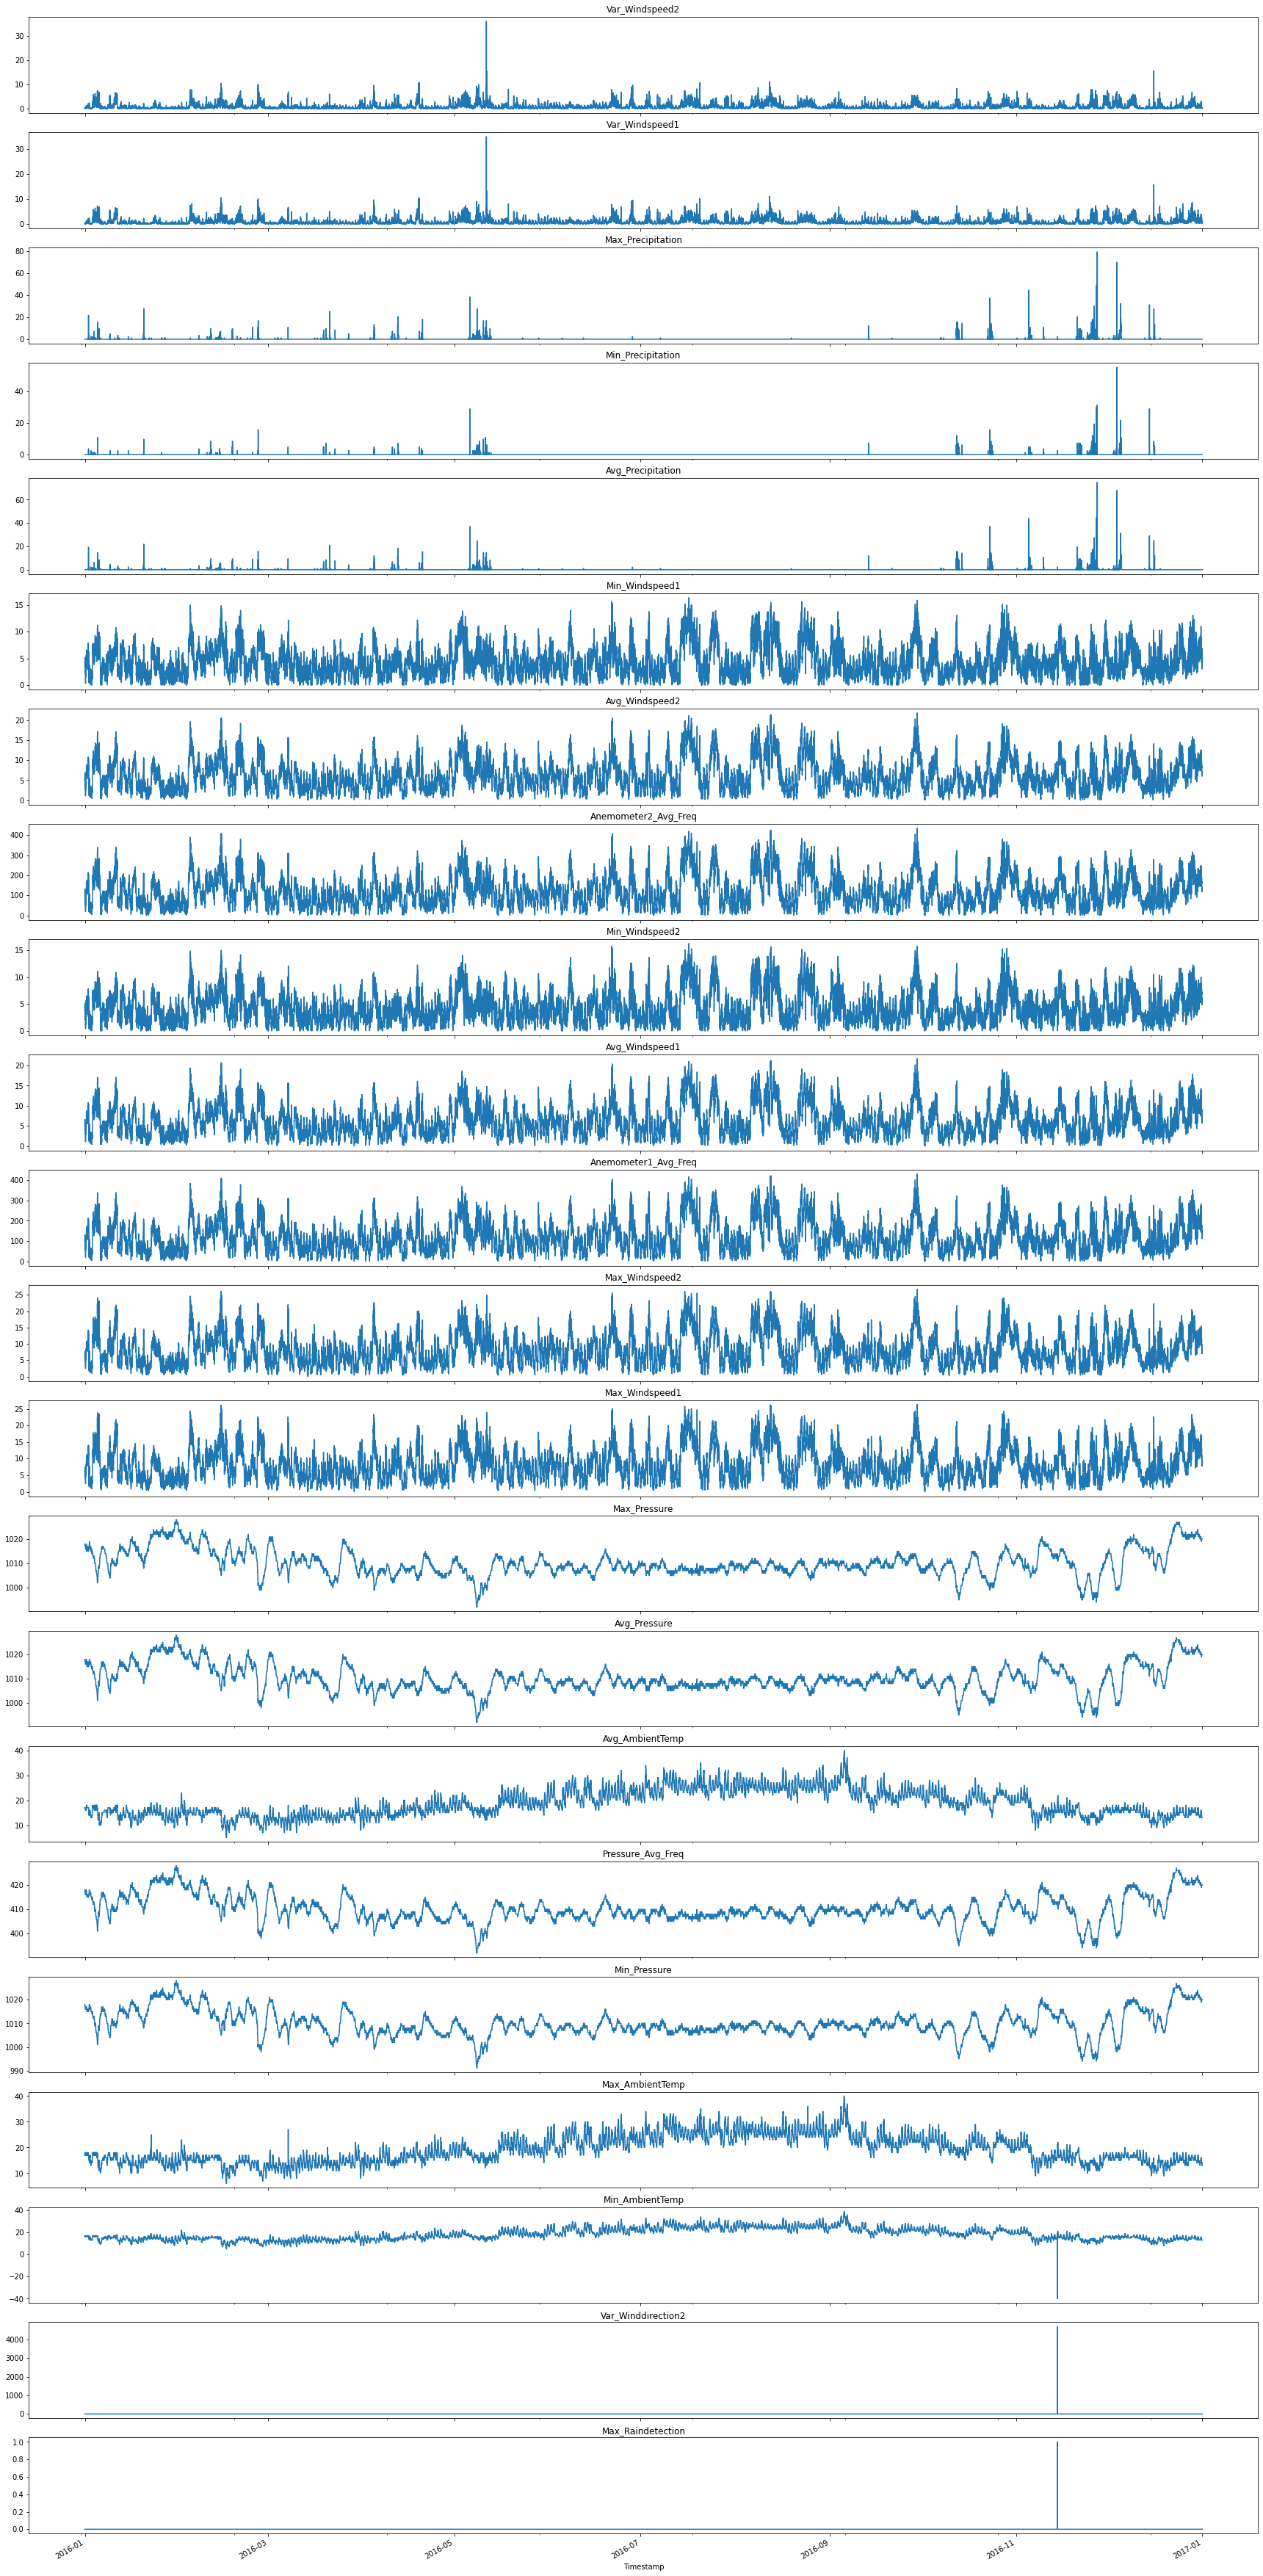

In [29]:
fig, axes = plt.subplots(figsize=(30,70), nrows=len(outliers_mast), sharex=True)
for i, col in enumerate(outliers_mast.index):
    ax = axes.ravel()[i]
    ax.set_title(col)
    mast[col].plot(ax=ax)

## d) Export Mast data

In [30]:
mast.to_pickle(os.path.join(DATA_CLEAN_ROOT, 'mast.p'))

# 6) Explore failures data

## a) Load data

In [31]:
failures = pd.read_csv(os.path.join(DATA_ROOT, DATA_FAILURE))

In [32]:
failures

,Unnamed: 0,Turbine_ID,Component,Timestamp,Remarks
0,0,T11,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator
1,1,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00+00:00,Error in pitch regulation
2,2,T07,GENERATOR_BEARING,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...
3,3,T09,GENERATOR_BEARING,2016-06-07 16:59:00+00:00,High tempemperature generator bearing
4,4,T07,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer
5,5,T06,GENERATOR,2016-07-11 19:48:00+00:00,Generator replaced
6,6,T01,GEARBOX,2016-07-18 02:10:00+00:00,Gearbox pump damaged
7,7,T06,GENERATOR,2016-07-24 17:01:00+00:00,Generator temperature sensor failure
8,8,T09,GENERATOR_BEARING,2016-08-22 18:25:00+00:00,High temperature generator bearing
9,9,T07,TRANSFORMER,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...


It seems that we have 16 failures. Each failure is associated to a component. The remarks can help understand the origin of the failure.